In [69]:
import pandas as pd
import re

# ===== 讀取 Excel =====
excel_file_path = '/content/test_sample.xlsx'
df = pd.read_excel(excel_file_path)

In [70]:
df.head()

,ID,label,content_cleaned
0,1,0,葉黃素、益生菌、魚油、蔓越莓錠。你需要的保健品️日本味王全部都有。家裡備著日本味王保健品。好...
1,2,1,海底椰是一種夏季常見的湯料以清燥熱、止咳功效顯著而聞名且具有滋陰補腎、潤肺養顏、強壯身體機能...
2,3,0,杏輝活芯升級版。健康從芯開始。一整天的會議轟炸感覺精神不濟、提不起勁只想癱在床上。趕公車、爬...
3,4,1,淨亮效果AAA擊退暗沉更快速亮澤肌防護AAA光澤AAA。你是否擁有以下肌膚問題:肌膚蠟黃暗沉...
4,5,0,醫學實證000有感排便順暢。保證投入菌數高達000億。益生菌AAA益生元AAA後生元。調整體...


In [71]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df['content_cleaned']
y = df['label']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=100,  # 100 samples for the test set
    stratify=y,     # Stratify based on the 'label' column
    random_state=42 # for reproducibility
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nDistribution of labels in y_train:")
display(y_train.value_counts())

print("\nDistribution of labels in y_test:")
display(y_test.value_counts())

Shape of X_train: (1442,)
Shape of X_test: (100,)
Shape of y_train: (1442,)
Shape of y_test: (100,)

Distribution of labels in y_train:


,count
label,
1,721
0,721



Distribution of labels in y_test:


,count
label,
0,50
1,50


In [72]:
# Install Jieba for Chinese word segmentation
!pip install jieba

In [73]:
import jieba

def segment_text(text):
    if isinstance(text, str):
        # Perform word segmentation
        seg_list = jieba.cut(text, cut_all=False) # cut_all=False for accurate mode
        return " ".join(seg_list)
    else:
        return ""

# Apply word segmentation to the cleaned content in both training and testing sets
X_train_segmented = X_train.apply(segment_text)
X_test_segmented = X_test.apply(segment_text)

print("Original X_train sample:")
display(X_train.head())

print("\nSegmented X_train sample:")
display(X_train_segmented.head())

print("\nOriginal X_test sample:")
display(X_test.head())

print("\nSegmented X_test sample:")
display(X_test_segmented.head())

Original X_train sample:


,content_cleaned
895,打破年齡設限‧看見青春立體。0AAA。撐補成分歲月細節一股腦地顯現在外表。支‧撐‧力000A...
187,兒童專科舒緩情緒消化提升敏感調理全台最足量健康食品變聰明變聰明的零食天然增加學習效率針對敏弱...
1440,0%增稠000%香料000%色素。維持消化道機能。日本專利膳食纖維多元益生菌。黃金比例口感細...
601,小胸救星升AAA不難。小胸&大胸女孩是不是有以下煩惱。撐不起衣服。哺乳後ㄋㄋ大縮水。美型拉提...
69,便秘救星、減肥聖品、減肥瘦瘦水、便祕必喝、便祕必喝、被封是減肥&解便秘聖品、便祕必喝、減肥聖...



Segmented X_train sample:


,content_cleaned
895,打破 年齡 設限 ‧ 看見 青春 立體 。 0AAA 。 撐補 成分 歲 月 細節 一股 腦...
187,兒童 專科 舒緩 情緒 消化 提升 敏感 調理 全台 最 足量 健康 食品 變聰明 變聰明 ...
1440,0% 增稠 000% 香料 000% 色素 。 維持 消化道 機能 。 日本 專利 膳食 纖...
601,小胸 救星 升 AAA 不難 。 小胸 & 大胸 女孩 是不是 有 以下 煩惱 。 撐 不起...
69,便秘 救星 、 減肥 聖品 、 減 肥瘦 瘦水 、 便 祕 必 喝 、 便 祕 必 喝 、 ...



Original X_test sample:


,content_cleaned
1078,享受尚好生活。享食尚健字號甘甘好活力加值組黃金組合甘甘好膠囊衛部健食字第AAA000號專為您...
1318,超模之鑰。防溢方案。官網000下殺000典悅生醫AAA搭配營養素幫助調節生理機能維持身體健康...
1348,商品。0益生菌益生質互利共生。0項全球專利後生元調整體質。幫助維持消化道機能。0色素、0人工...
89,抗藍光護眼軟糖。不如就給他吃抗藍光軟糖吧。吸收強光、過濾藍光、保護眼睛。適合族群:長時間盯著...
718,體力、美力一次擁有。0種AAA群完整組合。0合000美妍配方讓妳青春好自信。長效緩釋持續釋放...



Segmented X_test sample:


,content_cleaned
1078,享受 尚好 生活 。 享食 尚健字號 甘甘好 活力 加值 組黃金 組合 甘甘好 膠囊 衛部 ...
1318,超模 之 鑰 。 防溢 方案 。 官網 000 下 殺 000 典悅 生醫 AAA 搭配 營...
1348,商品 。 0 益生菌 益生質 互利 共生 。 0 項 全球 專利後生 元 調整 體質 。 幫...
89,抗藍光護 眼軟 糖 。 不如 就給 他 吃 抗藍光 軟糖 吧 。 吸收 強光 、 過濾 藍光...
718,體力 、 美力 一次 擁有 。 0 種 AAA 群 完整 組合 。 0 合 000 美妍 配...


In [74]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with min_df=2 to only include terms that appear at least twice
vectorizer = CountVectorizer(min_df=2)

# Learn the vocabulary and transform the training data
X_train_bow = vectorizer.fit_transform(X_train_segmented)

# Transform the testing data using the learned vocabulary
X_test_bow = vectorizer.transform(X_test_segmented)

print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)

Shape of X_train_bow: (1442, 5191)
Shape of X_test_bow: (100, 5191)


In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_bow.shape[1],)), # Added first hidden layer
    Dropout(0.5), # Added dropout for regularization
    Dense(64, activation='relu'), # Added second hidden layer
    Dropout(0.5), # Added dropout
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy', # Binary crossentropy for binary classification
              metrics=['accuracy']) # Monitor accuracy

# Print the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │       664,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 672,897 (2.57 MB)

 Trainable params: 672,897 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

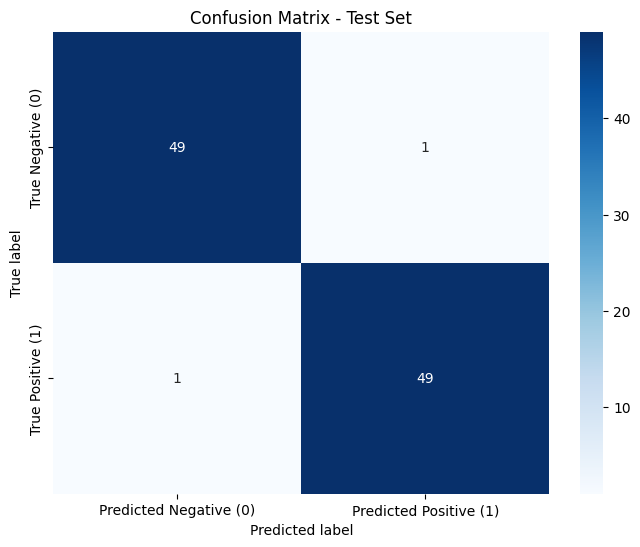

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test_numerical, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['True Negative (0)', 'True Positive (1)'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [77]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test_numerical, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [78]:
# Train the model
# Convert y_train and y_test to numerical dtype
y_train_numerical = y_train.astype(int)
y_test_numerical = y_test.astype(int)

# Convert sparse matrix to dense for Keras Dense layer compatibility
X_train_bow_dense = X_train_bow.todense()


history = model.fit(X_train_bow_dense, y_train_numerical, # Use dense input for training
                    epochs=10, # Increased number of training epochs
                    shuffle=False,
                    batch_size=32, # Adjusted batch size
                    validation_split=0.3) # Use 30% of training data for validation

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.6369 - loss: 0.6620 - val_accuracy: 0.9584 - val_loss: 0.3806
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9292 - loss: 0.3214 - val_accuracy: 0.9607 - val_loss: 0.1469
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9722 - loss: 0.1217 - val_accuracy: 0.9654 - val_loss: 0.1065
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9902 - loss: 0.0519 - val_accuracy: 0.9677 - val_loss: 0.0993
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9924 - loss: 0.0308 - val_accuracy: 0.9607 - val_loss: 0.0969
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 1.0000 - loss: 0.0142 - val_accuracy: 0.9630 - val_loss: 0.1017
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 1.0000 - loss: 0.0106 - val_accuracy: 0.9677 - val_loss: 0.1002
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9986 - loss: 0.0073 - val_accuracy: 0.9700 - v

In [79]:
# Evaluate the model on the test set
# Convert y_test to numerical dtype if it hasn't been already
y_test_numerical = y_test.astype(int)

# Convert sparse test matrix to dense for evaluation
X_test_bow_dense = X_test_bow.todense()


loss, accuracy = model.evaluate(X_test_bow_dense, y_test_numerical) # Use dense input for evaluation

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9753 - loss: 0.0915

Test Loss: 0.0780
Test Accuracy: 0.9800


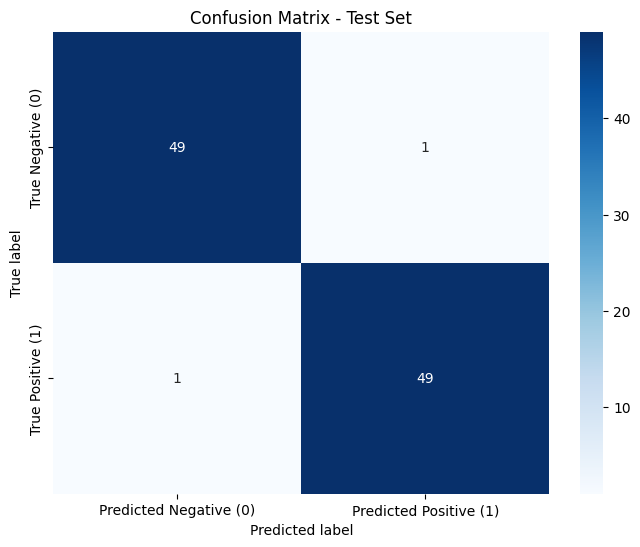

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test_numerical, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['True Negative (0)', 'True Positive (1)'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [81]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test_numerical, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [82]:
import numpy as np
X_test_dense = X_test_bow.toarray()
y_test_numerical = y_test.astype(int).values

y_pred_prob = model.predict(X_test_dense)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

results = pd.DataFrame({
    "text": X_test,
    "true": y_test_numerical,
    "pred": y_pred
})

tn = results[(results.true == 0) & (results.pred == 0)]
tp = results[(results.true == 1) & (results.pred == 1)]
fn = results[(results.true == 1) & (results.pred == 0)]
fp = results[(results.true == 0) & (results.pred == 1)]

examples = []
if len(tn) > 0: examples.append(("True Negative", tn.sample(1)))
if len(tp) > 0: examples.append(("True Positive", tp.sample(1)))
if len(fn) > 0: examples.append(("False Negative", fn.sample(1)))
if len(fp) > 0: examples.append(("False Positive", fp.sample(1)))

if len(examples) < 5:
    more_samples = results.sample(5 - len(examples))
    for _, row in more_samples.iterrows():
        examples.append(("Random", row.to_frame().T))

for label, row in examples:
    print(f"\n[{label}]")
    print("Text:", row["text"].values[0])
    print("True Label:", row["true"].values[0])
    print("Pred Label:", row["pred"].values[0])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

[True Negative]
Text: 採用優良蛋場出品的新鮮液蛋。不添加人工色素香料防腐劑。製造過程堅持不加一滴水。蛋素可食。
True Label: 0
Pred Label: 0

[True Positive]
Text: 關節、膝蓋保養維持好靈活行動力保養關鍵部位開始維護靈活行動力身體靈活力。保捷膠原錠讓我維持關鍵靈活全方位加強關鍵靈活舒適只要顧好關鍵部位就能靈活穩健地踏出每一步。憶加胜肽精華錠生活有條理思緒清晰有效提升行動舒適。爬樓梯、走步道緩慢不順舉步維艱的念頭揮之不去。密集運動損耗激增關鍵部位常感卡卡運動難以暢懷連帶影響生活品質。維護關鍵維持滋潤舒適加強鞏固提升了在運動時的靈活度不會覺得像以前一樣卡卡。關鍵部位不再像從前容易卡卡、不舒適。關鍵不適關鍵部位不舒服關鍵部位非常不舒服。走路不適影響運動找回我們的行動力。潤滑、修護、穩固爬山無力保養關鍵部位關鍵部位滋潤、輕盈穩固腳步。
True Label: 1
Pred Label: 1

[False Negative]
Text: 鈣質。而且不只影響我們的行動力、小朋友的成長狀況甚至也跟睡眠、情緒有相關。海藻鈣結構為蜂窩多孔性結構提供更好的吸收率可以高達000%。添加日本專利AAA水解蛋黃粉可以協同鈣作用。紐西蘭酪蛋白水解產物可幫助鈣質在消化道形成可溶性狀態促進鈣吸收。市售最高海藻鈣。
True Label: 1
Pred Label: 0

[False Positive]
Text: 國民戲劇男神李國毅代言科懋利脂受。百位產後媽咪試用調查000%排便順暢滿意。百位產後媽咪試用調查000%產品使用滿意。可以好好吃飯的秘密武器利脂受代謝AAA。餐前一包利脂受000有感。創新後生元AAA科學實證有感。榮獲000歐洲最佳營養品獎項。適合外食族、經常應酬、非哺乳期的產後媽媽、希望排便順暢者。
True Label: 0
Pred Label: 1

[Random]
Text: 0大成長優勢。成長腦智保護吸收安定均衡。轉骨必備。強化骨骼素。猴子造型水果口味口含錠。
True Label: 0
Pred Label: 0


# Task
Use the existing model to predict the labels (0 or 1) for the data in "test_sample.xlsx", without modifying the prediction criteria, and save the results to a new Excel file.

## Load the new data

### Subtask:
Load the data from `test_sample.xlsx` into a pandas DataFrame.


**Reasoning**:
The first step is to load the data from the specified Excel file into a pandas DataFrame as instructed by the subtask.



In [83]:
df_new = pd.read_excel('/content/test_sample.xlsx')
display(df_new.head())
display(df_new.info())

,ID,label,content_cleaned
0,1,0,拉蓓。閃纖舒眠益生菌凍每日一條輕鬆入口幫助調節生理機能維持腸道健康。富含膳食纖維促進消化道蠕...
1,2,0,天堂椒可以騙大腦的交感神經它可以騙大腦增加我們的靜態能量消耗。0瘦000公斤瘦了奶奶還變大。
2,3,0,每日一包堅果乾保持身體健康內含000種無調味堅果可加入牛奶或優格當早餐食用內為小包裝設計方便...
3,4,0,惠氏啟賦啟賦水解。0含豐富營養素有助於維持消化道機能促進腸道蠕動讓您每天輕鬆調節生理機能享受...
4,5,0,這款桔梗水梨汁有鎮咳抗炎以及抗氧化功效。氣管敏感朋友的救星。尤其特別適合容易喉嚨敏感、氣管、...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               100 non-null    int64 
 1   label            100 non-null    int64 
 2   content_cleaned  100 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


None

**Reasoning**:
The data has been loaded and inspected. The next step is to apply the same text segmentation function used for the training data to the new data.



In [84]:
df_new['content_segmented'] = df_new['content_cleaned'].apply(segment_text)
display(df_new.head())

,ID,label,content_cleaned,content_segmented
0,1,0,拉蓓。閃纖舒眠益生菌凍每日一條輕鬆入口幫助調節生理機能維持腸道健康。富含膳食纖維促進消化道蠕...,拉蓓 。 閃纖舒眠 益生菌 凍 每日 一條 輕 鬆 入口 幫助 調節 生理 機能 維持 腸道...
1,2,0,天堂椒可以騙大腦的交感神經它可以騙大腦增加我們的靜態能量消耗。0瘦000公斤瘦了奶奶還變大。,天堂 椒 可以 騙大腦 的 交感 神經 它 可以 騙大腦 增加 我們 的 靜態 能量消耗 。...
2,3,0,每日一包堅果乾保持身體健康內含000種無調味堅果可加入牛奶或優格當早餐食用內為小包裝設計方便...,每日 一包 堅果 乾 保持 身體 健康 內含 000 種無調 味 堅果 可 加入 牛奶 或 ...
3,4,0,惠氏啟賦啟賦水解。0含豐富營養素有助於維持消化道機能促進腸道蠕動讓您每天輕鬆調節生理機能享受...,惠氏 啟賦 啟賦 水解 。 0 含豐富 營養 素有 助 於 維持 消化道 機能 促進 腸道 ...
4,5,0,這款桔梗水梨汁有鎮咳抗炎以及抗氧化功效。氣管敏感朋友的救星。尤其特別適合容易喉嚨敏感、氣管、...,這款 桔梗 水 梨汁 有鎮 咳 抗炎 以及 抗氧化 功效 。 氣管 敏感 朋友 的 救星 。...


**Reasoning**:
The text data has been segmented. The next step is to transform the segmented text into a Bag-of-Words representation using the same vectorizer fitted on the training data. Then, the transformed data needs to be converted to a dense format for the Keras model.



In [85]:
X_new_bow = vectorizer.transform(df_new['content_segmented'])
X_new_dense = X_new_bow.todense()
print("Shape of X_new_dense:", X_new_dense.shape)

Shape of X_new_dense: (100, 5191)


**Reasoning**:
The new data has been preprocessed and is ready for prediction. The next step is to use the existing trained model to predict the labels for this new data.



In [86]:
y_pred_new_prob = model.predict(X_new_dense)
y_pred_new = (y_pred_new_prob >= 0.5).astype(int).flatten()

df_new['predicted_label'] = y_pred_new
display(df_new.head())

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


,ID,label,content_cleaned,content_segmented,predicted_label
0,1,0,拉蓓。閃纖舒眠益生菌凍每日一條輕鬆入口幫助調節生理機能維持腸道健康。富含膳食纖維促進消化道蠕...,拉蓓 。 閃纖舒眠 益生菌 凍 每日 一條 輕 鬆 入口 幫助 調節 生理 機能 維持 腸道...,0
1,2,0,天堂椒可以騙大腦的交感神經它可以騙大腦增加我們的靜態能量消耗。0瘦000公斤瘦了奶奶還變大。,天堂 椒 可以 騙大腦 的 交感 神經 它 可以 騙大腦 增加 我們 的 靜態 能量消耗 。...,1
2,3,0,每日一包堅果乾保持身體健康內含000種無調味堅果可加入牛奶或優格當早餐食用內為小包裝設計方便...,每日 一包 堅果 乾 保持 身體 健康 內含 000 種無調 味 堅果 可 加入 牛奶 或 ...,0
3,4,0,惠氏啟賦啟賦水解。0含豐富營養素有助於維持消化道機能促進腸道蠕動讓您每天輕鬆調節生理機能享受...,惠氏 啟賦 啟賦 水解 。 0 含豐富 營養 素有 助 於 維持 消化道 機能 促進 腸道 ...,0
4,5,0,這款桔梗水梨汁有鎮咳抗炎以及抗氧化功效。氣管敏感朋友的救星。尤其特別適合容易喉嚨敏感、氣管、...,這款 桔梗 水 梨汁 有鎮 咳 抗炎 以及 抗氧化 功效 。 氣管 敏感 朋友 的 救星 。...,1


**Reasoning**:
The predictions have been made and added to the DataFrame. The final step of the subtask is to save the DataFrame with the predictions to a new Excel file.

**Reasoning**:
The predictions have been made and added to the DataFrame. The final step of the subtask is to save the DataFrame with the predictions to a new Excel file.



In [88]:
output_path = '/content/test_sample_with_predictions.xlsx'
df_new.to_excel(output_path, index=False)
print(f"Results saved to {output_path}")

Results saved to /content/test_sample_with_predictions.xlsx


## Summary:

### Data Analysis Key Findings

*   The test data from `test_sample.xlsx` was successfully loaded, containing 100 entries with 'ID', 'label', and 'content\_cleaned' columns.
*   A new column `content_segmented` was created by applying text segmentation to the cleaned content.
*   The segmented text was vectorized into a dense Bag-of-Words representation with a shape of (100, 5191).
*   The pre-trained model was used to predict labels for the new data, adding a `predicted_label` column to the DataFrame.

### Insights or Next Steps

*   The predictions for the new data have been successfully generated and saved.
*   Compare the predicted labels with the original 'label' column in `test_sample.xlsx` to evaluate the model's performance on this specific dataset.
